In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import numpy as np
from image2image_io.readers import get_simple_reader
from image2image_io.readers._czi import CziFile, get_czi_thumbnail
from image2image_io.readers.czi_reader import CziImageReader
from image2image_io.writers import write_ome_tiff_from_array
from pathlib import Path

import matplotlib.pyplot as plt

In [31]:
path = r"/Users/lgmigas/Documents/GoodSync/2025_08_CZI/250626_hukid1_preAF.czi"
path = r"D:\2025-10-fix-czi\250721_S-2308-001973_2_postAF.czi"
path = r"/Users/lgmigas/Downloads/xt-scan-lsm980.czi"
# path = r"/Users/lgmigas/Downloads/xzt-scan-lsm980.czi"
path = r"/Users/lgmigas/Documents/GitHub/image2image-io/tests/_test_data/multichannel-image.czi"
czi = CziImageReader(path)
data = czi.fh.asarray_alt()
data.shape, czi.fh.axes, czi.pyramid[0].shape

Reading subblocks: 100%|██████████| 3575/3575 [00:00<00:00, 14450.68block/s]


((1, 5, 1, 715, 1, 512, 1), 'HTCZYX0', (5, 715, 512))

In [44]:
czi.fh.as_tzcyx0_array().shape

Reading subblocks: 100%|██████████| 3575/3575 [00:00<00:00, 12071.91block/s]


(5, 715, 1, 1, 512, 1)

In [38]:
czi.fh.axes.index("C")

2

In [39]:
czi.fh.shape

(1, 5, 1, 715, 1, 512, 1)

In [43]:
czi.pyramid

[dask.array<getitem, shape=(5, 715, 512), dtype=uint8, chunksize=(1, 1, 512), chunktype=numpy.ndarray>]

In [36]:
czi._get_image_info()

(2, 4, 5, array([  1,   1, 512]), (1, 512), dtype('uint8'))

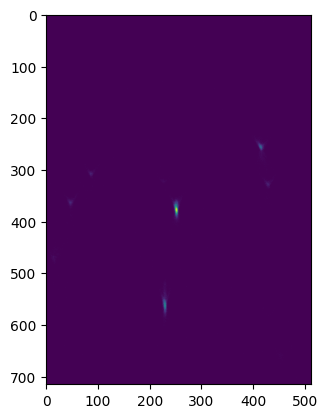

In [42]:
plt.imshow(czi.pyramid[0][0])

In [ ]:
czi.

Reading subblocks: 100%|██████████| 150/150 [00:00<00:00, 16964.50block/s]


array([[[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]],




       [[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]],




       [[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]],




       ...,




       [[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]],




       [[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]],




       [[[[[0],
           [0],
           [0],
           ...,
           [0],
           [0],
           [0]]]]]], dtype=uint8)

In [7]:
data.transpose()

array([[[[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]],




        [[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]],




        [[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]],




        ...,




        [[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]],




        [[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]],




        [[[[[0],
            [0],
            [0],
            ...,
            [0],
            [0],
            [0]]]]]]], dtype=uint8)

In [4]:
reader = get_simple_reader(path, init_pyramid=False, scene_index=0)

In [5]:
array, scale = get_czi_thumbnail(reader.fh, reader.scale)
scale

(7.049029807183001, 7.049029807183001)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..58847].


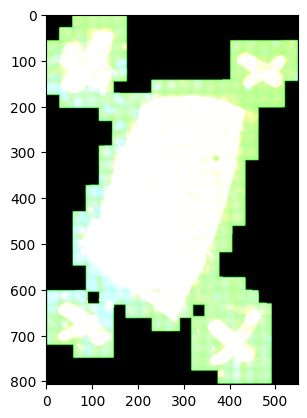

In [14]:
plt.imshow(np.swapaxes(array, 0, -1))

In [6]:
data = reader.fh.asarray()

In [7]:
data.shape

(1, 3, 10929, 5932, 3)

In [8]:
data2 = reader.fh.asarray_alt()

Reading subblocks: 100%|██████████| 111/111 [00:00<00:00, 264.71block/s]


In [9]:
data2.shape

(1, 3, 10929, 5932, 3)

In [9]:
reader.fh.shape

(1, 3, 10929, 5932, 3)

In [10]:
axes = list(reader.fh.axes)
shape = list(reader.fh.shape)
orig_shape = list(reader.fh.shape)
axes, shape, orig_shape

(['S', 'C', 'Y', 'X', '0'], [1, 3, 10929, 5932, 3], [1, 3, 10929, 5932, 3])

In [11]:
all_axes = list(axes)
yx_dims = np.where(np.isin(all_axes, ["Y", "X"]) == 1)[0].tolist()
yx_shape = np.array(shape[slice(yx_dims[0], yx_dims[1] + 1)])
all_axes, yx_dims, yx_shape

(['S', 'C', 'Y', 'X', '0'], [2, 3], array([10929,  5932]))

In [26]:
reader.channel_names

['Bright', 'EGFP', 'DsRed']

In [10]:
data = np.squeeze(data)

In [32]:
data[0][:, :, 0].shape

(10929, 5932)

In [11]:
names, arrays = [], []
for i in range(3):
    channel_name = reader.channel_names[i]
    array = data[i]
    for j in range(3):
        name = f"{channel_name}-{j}"
        names.append(name)
        arrays.append(array[:, :, j])
arrays = np.stack(arrays, axis=0)
arrays.shape

(9, 10929, 5932)

In [ ]:
base_dir = Path(r"Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF")
files = list(base_dir.glob("250721*.czi"))
files

[WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_BlockQC_2_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_BlockQC_3_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2308-001973_2_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2308-001973_3_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2401-005307_2_postAF-1.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2401-005307_2_postAF-2.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2401-005307_3_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2401-005354_2_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2401-005354_3_postAF.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-2402-002820_2_postAF-1.czi'),
 WindowsPath('Y:/kpmp/sandbox/anna/KPMP - Batch 4/postAF/250721_S-

In [ ]:
output_dir = base_dir / "ome-tiffs"
output_dir.mkdir(exist_ok=True, parents=True)

for file in files:
    output_file = output_dir / f"{reader.path.stem}.ome.tiff"
    if output_file.exists():
        continue

    czi = CziFile(file)
    reader = get_simple_reader(file, init_pyramid=False, scene_index=0)

    axes = list(reader.fh.axes)
    shape = list(reader.fh.shape)
    orig_shape = list(reader.fh.shape)
    channel_names = reader.channel_names
    print(axes, shape, orig_shape, channel_names)

    data = reader.fh.asarray()
    data = np.squeeze(data)

    names, arrays = [], []
    for i in range(3):
        channel_name = reader.channel_names[i]
        array = data[i]
        names.append(channel_name)
        arrays.append(array[:, :, 0])
    arrays = np.stack(arrays, axis=0)

    write_ome_tiff_from_array(
        output_file,
        channel_names=names,
        array=arrays,
        reader=None,
        resolution=reader.resolution
)

In [70]:
output_dir = base_dir / "ome-tiffs-sum"
output_dir.mkdir(exist_ok=True, parents=True)

for file in files:
    output_file = output_dir / f"{reader.path.stem}.ome.tiff"
    if output_file.exists():
        continue

    czi = CziFile(file)
    reader = get_simple_reader(file, init_pyramid=False, scene_index=0)

    axes = list(reader.fh.axes)
    shape = list(reader.fh.shape)
    orig_shape = list(reader.fh.shape)
    channel_names = reader.channel_names
    print(axes, shape, orig_shape, channel_names)

    data = reader.fh.asarray()
    data = np.squeeze(data)

    names, arrays = [], []
    for i in range(3):
        channel_name = reader.channel_names[i]
        array = data[i]
        sum = array.sum(axis=(0, 1))
        names.append(channel_name)
        arrays.append(array[:, :, sum.argmax()])
    arrays = np.stack(arrays, axis=0)

    write_ome_tiff_from_array(
        output_file,
        channel_names=names,
        array=arrays,
        reader=None,
        resolution=reader.resolution
)

['S', 'C', 'Y', 'X', '0'] [1, 3, 17403, 16010, 3] [1, 3, 17403, 16010, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:04:25.096 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2404-011035_3_postAF.ome.tiff'
2025-10-21 06:04:25.096 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 17403, 16010) @ 0.4406>
2025-10-21 06:04:25.096 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:04:25.096 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 18485, 16017, 3] [1, 3, 18485, 16017, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:06:17.995 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_BlockQC_2_postAF.ome.tiff'
2025-10-21 06:06:17.995 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 18485, 16017) @ 0.4406>
2025-10-21 06:06:17.995 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:06:18.010 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10929, 5932, 3] [1, 3, 10929, 5932, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:06:27.547 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_BlockQC_3_postAF.ome.tiff'
2025-10-21 06:06:27.547 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10929, 5932) @ 0.4406>
2025-10-21 06:06:27.547 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:06:27.563 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9845, 5922, 3] [1, 3, 9845, 5922, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:06:41.446 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2308-001973_2_postAF.ome.tiff'
2025-10-21 06:06:41.447 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9845, 5922) @ 0.4406>
2025-10-21 06:06:41.447 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:06:41.449 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13078, 7376, 3] [1, 3, 13078, 7376, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:07:09.728 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2308-001973_3_postAF.ome.tiff'
2025-10-21 06:07:09.728 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13078, 7376) @ 0.4406>
2025-10-21 06:07:09.728 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:07:09.728 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9847, 11681, 3] [1, 3, 9847, 11681, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:07:37.240 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2401-005307_2_postAF-1.ome.tiff'
2025-10-21 06:07:37.241 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9847, 11681) @ 0.4406>
2025-10-21 06:07:37.242 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:07:37.243 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 30356, 14589, 3] [1, 3, 30356, 14589, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:08:11.064 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2401-005307_2_postAF-2.ome.tiff'
2025-10-21 06:08:11.065 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 30356, 14589) @ 0.4406>
2025-10-21 06:08:11.066 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:08:11.068 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16320, 7376, 3] [1, 3, 16320, 7376, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:08:52.577 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2401-005307_3_postAF.ome.tiff'
2025-10-21 06:08:52.578 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16320, 7376) @ 0.4406>
2025-10-21 06:08:52.579 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:08:52.581 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 15252, 11669, 3] [1, 3, 15252, 11669, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:09:33.570 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2401-005354_2_postAF.ome.tiff'
2025-10-21 06:09:33.570 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 15252, 11669) @ 0.4406>
2025-10-21 06:09:33.570 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:09:33.570 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10901, 11691, 3] [1, 3, 10901, 11691, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:10:02.685 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2401-005354_3_postAF.ome.tiff'
2025-10-21 06:10:02.687 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10901, 11691) @ 0.4406>
2025-10-21 06:10:02.688 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:10:02.691 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 8764, 8799, 3] [1, 3, 8764, 8799, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:10:19.011 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_2_postAF-1.ome.tiff'
2025-10-21 06:10:19.012 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 8764, 8799) @ 0.4406>
2025-10-21 06:10:19.012 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:10:19.014 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13081, 7352, 3] [1, 3, 13081, 7352, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:10:41.044 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_2_postAF-2.ome.tiff'
2025-10-21 06:10:41.045 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13081, 7352) @ 0.4406>
2025-10-21 06:10:41.045 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:10:41.047 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9833, 10244, 3] [1, 3, 9833, 10244, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:04.158 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_2_postAF-3.ome.tiff'
2025-10-21 06:11:04.158 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9833, 10244) @ 0.4406>
2025-10-21 06:11:04.158 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:04.158 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10926, 7360, 3] [1, 3, 10926, 7360, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:16.563 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_3_postAF-1.ome.tiff'
2025-10-21 06:11:16.563 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10926, 7360) @ 0.4406>
2025-10-21 06:11:16.563 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:16.563 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 14152, 7354, 3] [1, 3, 14152, 7354, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:26.678 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_3_postAF-2.ome.tiff'
2025-10-21 06:11:26.678 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 14152, 7354) @ 0.4406>
2025-10-21 06:11:26.678 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:26.678 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13080, 8792, 3] [1, 3, 13080, 8792, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:37.117 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002820_3_postAF-3.ome.tiff'
2025-10-21 06:11:37.117 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13080, 8792) @ 0.4406>
2025-10-21 06:11:37.117 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:37.133 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 14164, 7360, 3] [1, 3, 14164, 7360, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:46.803 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002867_2_postAF.ome.tiff'
2025-10-21 06:11:46.804 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 14164, 7360) @ 0.4406>
2025-10-21 06:11:46.805 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:46.808 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16316, 7364, 3] [1, 3, 16316, 7364, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:11:57.972 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2402-002867_3_postAF.ome.tiff'
2025-10-21 06:11:57.973 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16316, 7364) @ 0.4406>
2025-10-21 06:11:57.973 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:11:57.975 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16322, 7364, 3] [1, 3, 16322, 7364, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:12:06.993 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-sum\250721_S-2404-011035_2_postAF.ome.tiff'
2025-10-21 06:12:06.993 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16322, 7364) @ 0.4406>
2025-10-21 06:12:06.993 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:12:06.993 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


In [71]:
output_dir = base_dir / "ome-tiffs-mean"
output_dir.mkdir(exist_ok=True, parents=True)

for file in files:
    output_file = output_dir / f"{reader.path.stem}.ome.tiff"
    if output_file.exists():
        continue

    czi = CziFile(file)
    reader = get_simple_reader(file, init_pyramid=False, scene_index=0)

    axes = list(reader.fh.axes)
    shape = list(reader.fh.shape)
    orig_shape = list(reader.fh.shape)
    channel_names = reader.channel_names
    print(axes, shape, orig_shape, channel_names)

    data = reader.fh.asarray()
    data = np.squeeze(data)

    names, arrays = [], []
    for i in range(3):
        channel_name = reader.channel_names[i]
        array = data[i]
        mean = array.mean(axis=(0, 1))
        names.append(channel_name)
        arrays.append(array[:, :, mean.argmax()])
    arrays = np.stack(arrays, axis=0)

    write_ome_tiff_from_array(
        output_file,
        channel_names=names,
        array=arrays,
        reader=None,
        resolution=reader.resolution
)

['S', 'C', 'Y', 'X', '0'] [1, 3, 17403, 16010, 3] [1, 3, 17403, 16010, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:12:30.492 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2404-011035_3_postAF.ome.tiff'
2025-10-21 06:12:30.492 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 17403, 16010) @ 0.4406>
2025-10-21 06:12:30.492 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:12:30.492 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 18485, 16017, 3] [1, 3, 18485, 16017, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:12:57.799 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_BlockQC_2_postAF.ome.tiff'
2025-10-21 06:12:57.799 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 18485, 16017) @ 0.4406>
2025-10-21 06:12:57.799 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:12:57.799 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10929, 5932, 3] [1, 3, 10929, 5932, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:13:07.233 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_BlockQC_3_postAF.ome.tiff'
2025-10-21 06:13:07.233 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10929, 5932) @ 0.4406>
2025-10-21 06:13:07.233 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:13:07.233 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9845, 5922, 3] [1, 3, 9845, 5922, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:13:12.916 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2308-001973_2_postAF.ome.tiff'
2025-10-21 06:13:12.916 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9845, 5922) @ 0.4406>
2025-10-21 06:13:12.916 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:13:12.932 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13078, 7376, 3] [1, 3, 13078, 7376, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:13:20.971 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2308-001973_3_postAF.ome.tiff'
2025-10-21 06:13:20.971 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13078, 7376) @ 0.4406>
2025-10-21 06:13:20.971 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:13:20.981 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9847, 11681, 3] [1, 3, 9847, 11681, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:13:30.494 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2401-005307_2_postAF-1.ome.tiff'
2025-10-21 06:13:30.496 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9847, 11681) @ 0.4406>
2025-10-21 06:13:30.496 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:13:30.498 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 30356, 14589, 3] [1, 3, 30356, 14589, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:01.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2401-005307_2_postAF-2.ome.tiff'
2025-10-21 06:14:01.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 30356, 14589) @ 0.4406>
2025-10-21 06:14:01.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:01.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16320, 7376, 3] [1, 3, 16320, 7376, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:15.450 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2401-005307_3_postAF.ome.tiff'
2025-10-21 06:14:15.451 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16320, 7376) @ 0.4406>
2025-10-21 06:14:15.452 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:15.453 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 15252, 11669, 3] [1, 3, 15252, 11669, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:29.443 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2401-005354_2_postAF.ome.tiff'
2025-10-21 06:14:29.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 15252, 11669) @ 0.4406>
2025-10-21 06:14:29.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:29.446 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10901, 11691, 3] [1, 3, 10901, 11691, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:40.419 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2401-005354_3_postAF.ome.tiff'
2025-10-21 06:14:40.420 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10901, 11691) @ 0.4406>
2025-10-21 06:14:40.421 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:40.423 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 8764, 8799, 3] [1, 3, 8764, 8799, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:47.814 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_2_postAF-1.ome.tiff'
2025-10-21 06:14:47.815 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 8764, 8799) @ 0.4406>
2025-10-21 06:14:47.815 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:47.817 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13081, 7352, 3] [1, 3, 13081, 7352, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:14:56.100 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_2_postAF-2.ome.tiff'
2025-10-21 06:14:56.101 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13081, 7352) @ 0.4406>
2025-10-21 06:14:56.101 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:14:56.103 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 9833, 10244, 3] [1, 3, 9833, 10244, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:04.475 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_2_postAF-3.ome.tiff'
2025-10-21 06:15:04.476 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 9833, 10244) @ 0.4406>
2025-10-21 06:15:04.476 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:04.479 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 10926, 7360, 3] [1, 3, 10926, 7360, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:11.922 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_3_postAF-1.ome.tiff'
2025-10-21 06:15:11.923 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 10926, 7360) @ 0.4406>
2025-10-21 06:15:11.923 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:11.925 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 14152, 7354, 3] [1, 3, 14152, 7354, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:20.512 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_3_postAF-2.ome.tiff'
2025-10-21 06:15:20.513 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 14152, 7354) @ 0.4406>
2025-10-21 06:15:20.514 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:20.516 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 13080, 8792, 3] [1, 3, 13080, 8792, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:30.442 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002820_3_postAF-3.ome.tiff'
2025-10-21 06:15:30.443 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 13080, 8792) @ 0.4406>
2025-10-21 06:15:30.444 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:30.446 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 14164, 7360, 3] [1, 3, 14164, 7360, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:39.808 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002867_2_postAF.ome.tiff'
2025-10-21 06:15:39.810 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 14164, 7360) @ 0.4406>
2025-10-21 06:15:39.811 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:39.813 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16316, 7364, 3] [1, 3, 16316, 7364, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:50.561 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2402-002867_3_postAF.ome.tiff'
2025-10-21 06:15:50.562 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16316, 7364) @ 0.4406>
2025-10-21 06:15:50.562 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:50.564 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


['S', 'C', 'Y', 'X', '0'] [1, 3, 16322, 7364, 3] [1, 3, 16322, 7364, 3] ['Bright', 'EGFP', 'DsRed']


2025-10-21 06:15:58.958 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'Y:\kpmp\sandbox\anna\KPMP - Batch 4\postAF\ome-tiffs-mean\250721_S-2404-011035_2_postAF.ome.tiff'
2025-10-21 06:15:58.960 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (3, 16322, 7364) @ 0.4406>
2025-10-21 06:15:58.960 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 06:15:58.962 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]


In [48]:
write_ome_tiff_from_array(
    reader.path.parent / f"{reader.path.stem}_fixed.ome.tiff",
    channel_names=names,
    array=arrays,
    reader=None,
    resolution=reader.resolution
)

2025-10-21 02:40:57.902 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:244 - Saving to 'D:\2025-10-fix-czi\250721_S-2308-001973_2_postAF_fixed.ome.tiff'
2025-10-21 02:40:57.903 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:245 - Using reader: ArrayImageReader<''; WindowsPath('.'); RGB=False; (9, 10929, 5932) @ 0.4406>
2025-10-21 02:40:57.904 | INFO     | image2image_io.writers.tiff_writer:_prepare_tiff:246 - Using transformer: None
2025-10-21 02:40:57.906 | INFO     | image2image_io.writers.tiff_writer:_prepare_image_info:220 - Saving using deflate compression. Datatype: <class 'numpy.uint8'> (as_uint8=True)
Writing channels...: 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]


WindowsPath('D:/2025-10-fix-czi/250721_S-2308-001973_2_postAF_fixed.ome.tiff')

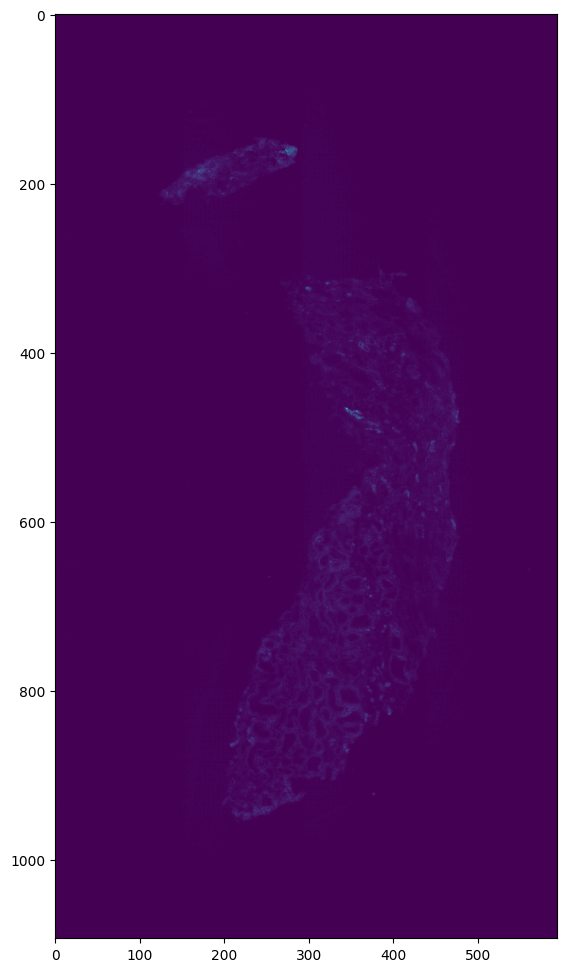

In [39]:
plt.figure(figsize=(12, 12))
plt.imshow(data[1][::10, ::10, 0])